### Exploratory Data Analysis

#### 1. Load the dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

#### 2. Load the data

In [3]:
df = pd.read_csv('Amazon_Food_Reviews_cleaned.csv')

In [17]:
df.head(1).T

,0
Unnamed: 0,519868
Id,519869
ProductId,B000YSTIL0
UserId,A3R8GMMQBX0OAD
ProfileName,Ma Princesse
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,5
Time,1272067200
Summary,Best Snack Ever!!


#### 3. Remove unnecessary features

In [25]:
df=df.drop(columns=['Unnamed: 0', 'Id', 'UserId', 'ProfileName'])

#### 4. Data visualisation

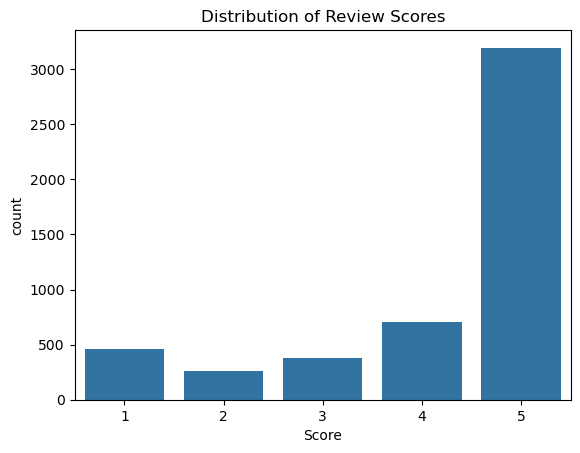

In [27]:
sns.countplot(x='Score', data=df)
plt.title('Distribution of Review Scores')
plt.show()

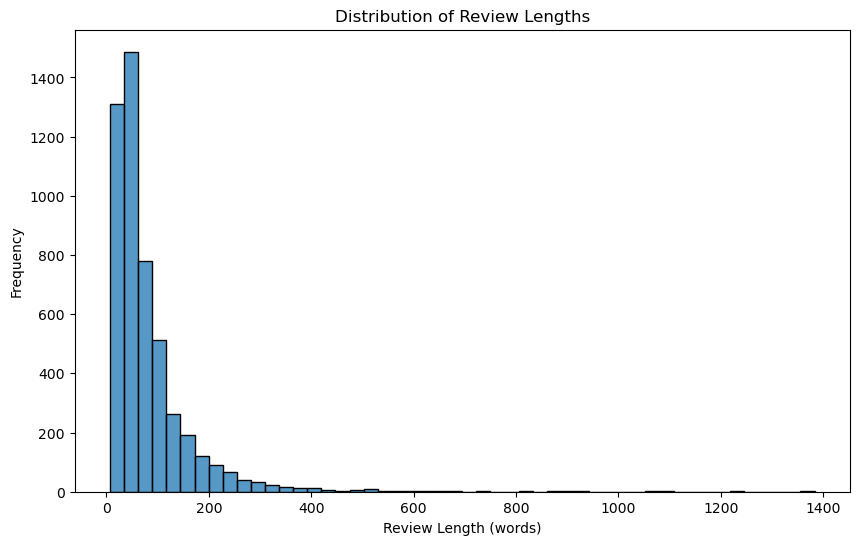

In [29]:
df['review_length'] = df['Text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

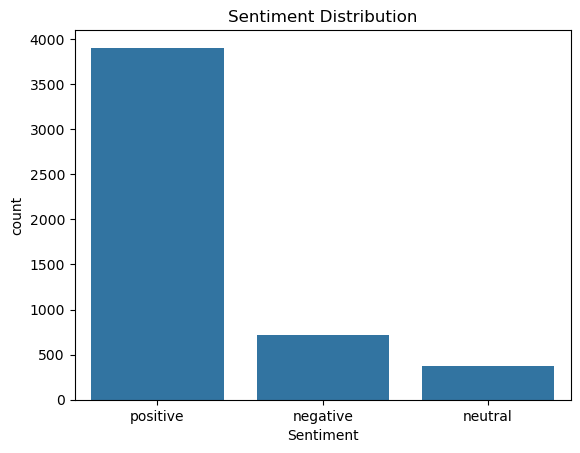

In [31]:
df['Sentiment'] = df['Score'].apply(lambda x: 'positive' if x > 3 else ('neutral' if x == 3 else 'negative'))

sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

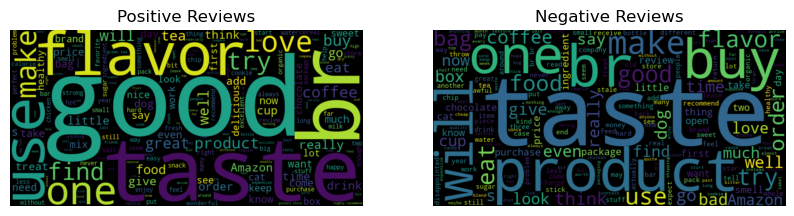

In [33]:
from wordcloud import WordCloud

positive_reviews = ' '.join(df[df['Sentiment'] == 'positive']['cleaned_lemmas'])
negative_reviews = ' '.join(df[df['Sentiment'] == 'negative']['cleaned_lemmas'])

wordcloud_pos = WordCloud(width=800, height=400).generate(positive_reviews)
wordcloud_neg = WordCloud(width=800, height=400).generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.show()

#### 5. Correlation

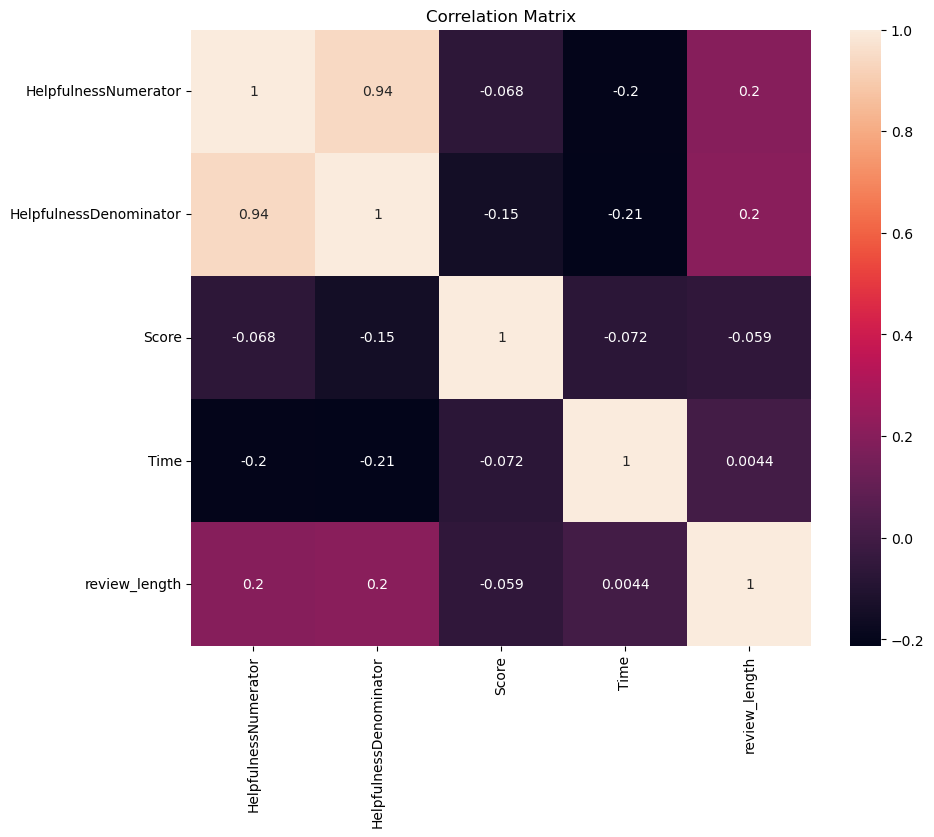

In [35]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

#### 6. Feature engineering

In [39]:
# Function to classify sentiment based on score
def classify_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:  # This covers scores 1 and 2
        return 'negative'

# Apply the sentiment classification function
df['Sentiment'] = df['Score'].apply(classify_sentiment)

# Display the updated DataFrame
print(df[['Text', 'Score', 'Sentiment']])

                                                   Text  Score Sentiment
0     I love these chips! This is the best snack eve...      5  positive
1     This is a really good chocolate candy, has jus...      5  positive
2     My wife has a male cat who throws up EVERYTHIN...      5  positive
3     This entire product line is absolutely great! ...      5  positive
4     I use this to keep my blood level stable all d...      5  positive
...                                                 ...    ...       ...
4995  As with Mr. Carlson's review, my order was als...      2  negative
4996  I've been ordering a lot of these. Many of the...      2  negative
4997  The Dogswell Happy Hips Sweet Potato Chews I b...      2  negative
4998  Just so you understand me, my last meal on ear...      2  negative
4999  These traps work and they require less excavat...      2  negative

[5000 rows x 3 columns]


In [41]:
## Save as csv file
df.to_csv('Amazon_review_sentiment.csv', index=False)